# Convolution
$$
f_3(t) = \int_{-\infty}^{\infty} f_1(\tau)f_2(t-\tau) d\tau
$$
To visualize, compute integrand: $f_1(\tau)f_2(t-\tau)$ for each value of $\tau$

In [4]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material

from sympy.abc import t, x
init_printing(pretty_print=True)

Running Python: 3.8.17
Running Sympy: 1.12rc1


In [5]:
def convolve(f, g, t, lower_limit=-oo, upper_limit=oo):
    tau = Symbol('__very_unlikely_name__', real=True)
    return integrate(f.subs(t, tau) * g.subs(t, t - tau), (tau, lower_limit, upper_limit))

In [6]:
# Two functions that are f_amp valued between f_min and f_max
f1min = 0
f1max = 3
f1amp = 2

f2min = 0
f2max = 2
f2amp = 2

f1 = Piecewise((0, t < f1min),(f1amp, t <= f1max),(0, True))
f2 = Piecewise((0, t < f2min),(f2amp, t <= f2max),(0, True))
f3 = convolve(f1, f2, t)
f3amp = f1amp*f2amp

In [7]:
lam_f1 = lambdify(t, f1, modules=['numpy'])
lam_f2 = lambdify(t, f2, modules=['numpy'])
lam_f3 = lambdify(t, f3, modules=['numpy'])

tt_vals = linspace(-2-f2max+f1min, f1max+f2max+1, 1000)
tau_vals = linspace(-(f1max+f2max+1), f1max+f2max+1, 1000)

# don't know why lam_f3(tt_vals) fails
f3_tt = []
for tt in tt_vals:
    f3_tt.append(lam_f3(tt))

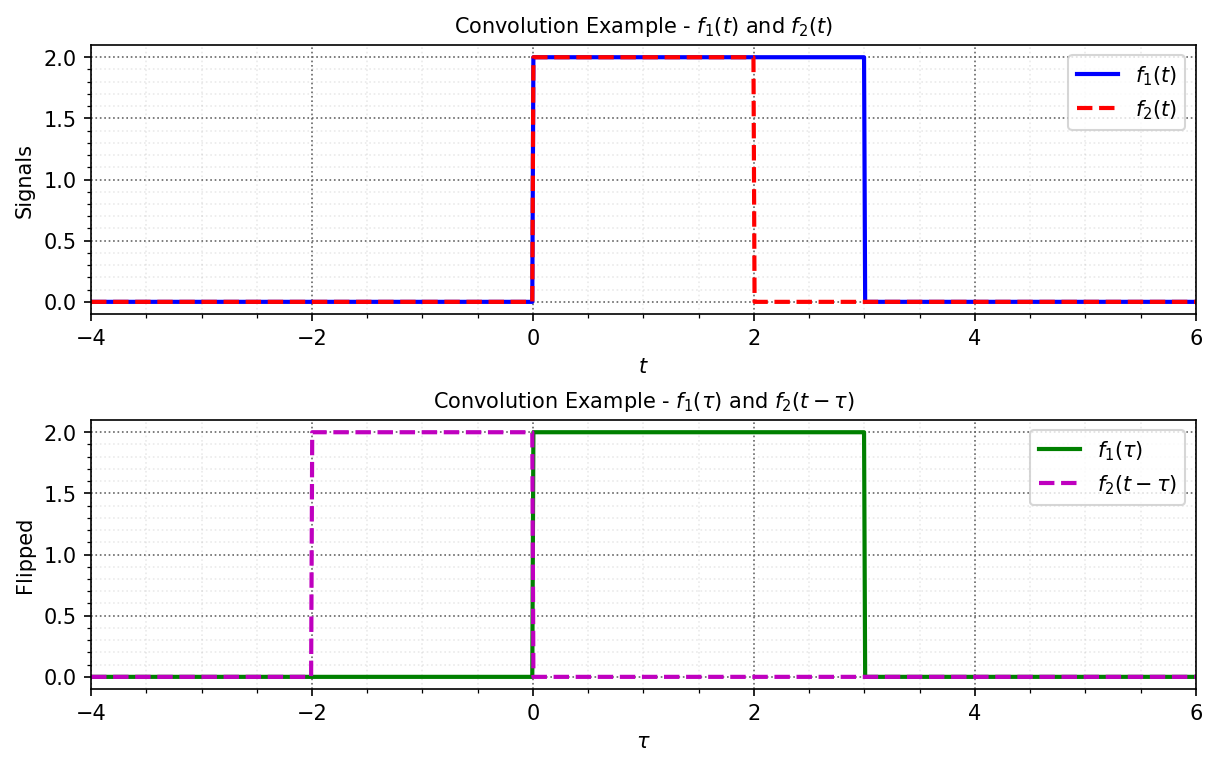

In [8]:
fig, axs = plt.subplots(2,figsize=(8, 5),constrained_layout = True)
axs[0].plot(tt_vals, lam_f1(tt_vals),'b-',lw=2,label='$f_1(t)$')
axs[0].plot(tt_vals, lam_f2(tt_vals),'r--',label='$f_2(t)$')
axs[1].plot(tt_vals, lam_f1(tt_vals),'g-',label=r'$f_1(\tau)$')
axs[1].plot(tt_vals, lam_f2(0-tt_vals),'m--',label=r'$f_2(t-\tau)$')
nicegrid(axs[0])
nicegrid(axs[1])
axs[0].legend()
axs[1].legend()
axs[0].set_ylabel("Signals")
axs[1].set_ylabel("Flipped")
axs[0].set_xlabel("$t$")
axs[1].set_xlabel(r"$\tau$")
axs[0].set_title(r"Convolution Example - $f_1(t)$ and $f_2(t)$")
axs[1].set_title(r"Convolution Example - $f_1(\tau)$ and $f_2(t-\tau)$")
plt.show()

In [13]:
def plot_functions(tval):
    plt.plot(tau_vals, lam_f1(tau_vals),'b-',lw=2,label=r'$f_1(\tau)$')
    if tval < 0:
        plt.plot(tau_vals, lam_f2(tval-tau_vals),'c-',label=r'$f_2(-(\tau+'+str(-tval)+'))$')
    else:
        plt.plot(tau_vals, lam_f2(tval-tau_vals),'c-',label=r'$f_2(-(\tau-'+str(tval)+'))$')
    if (tval >= f1min + f2min) & (tval <= f1max + f2max):
        plt.fill([max(f1min,tval-f2max),max(f1min,tval-f2max),min(tval-f2min,f1max),min(tval-f2min,f1max)],[0,f3amp,f3amp,0],'g',alpha=0.3,label=r'$f_2('+str(tval)+r' - \tau)f_1(\tau)$')

    nicegrid()
    plt.legend()
    plt.ylabel("Signal")
    plt.xlabel(r"$\tau$")
    plt.title('Convolution Example $t = $'+str(tval))
    plt.show()

### Approaching from left - still outside

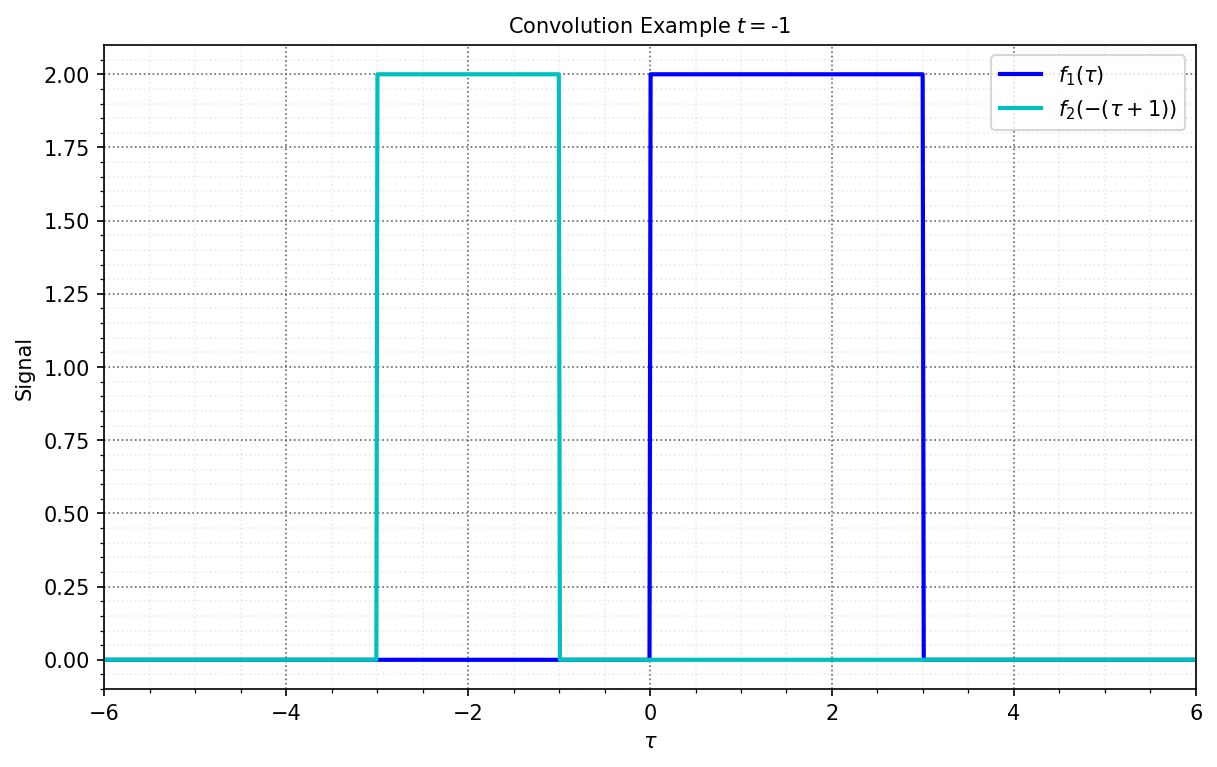

In [14]:
tval = f1min + f2min - 1
fig = plt.figure(1,figsize=(8, 5),constrained_layout = True)
plot_functions(tval)

### Approaching from left - overlapping

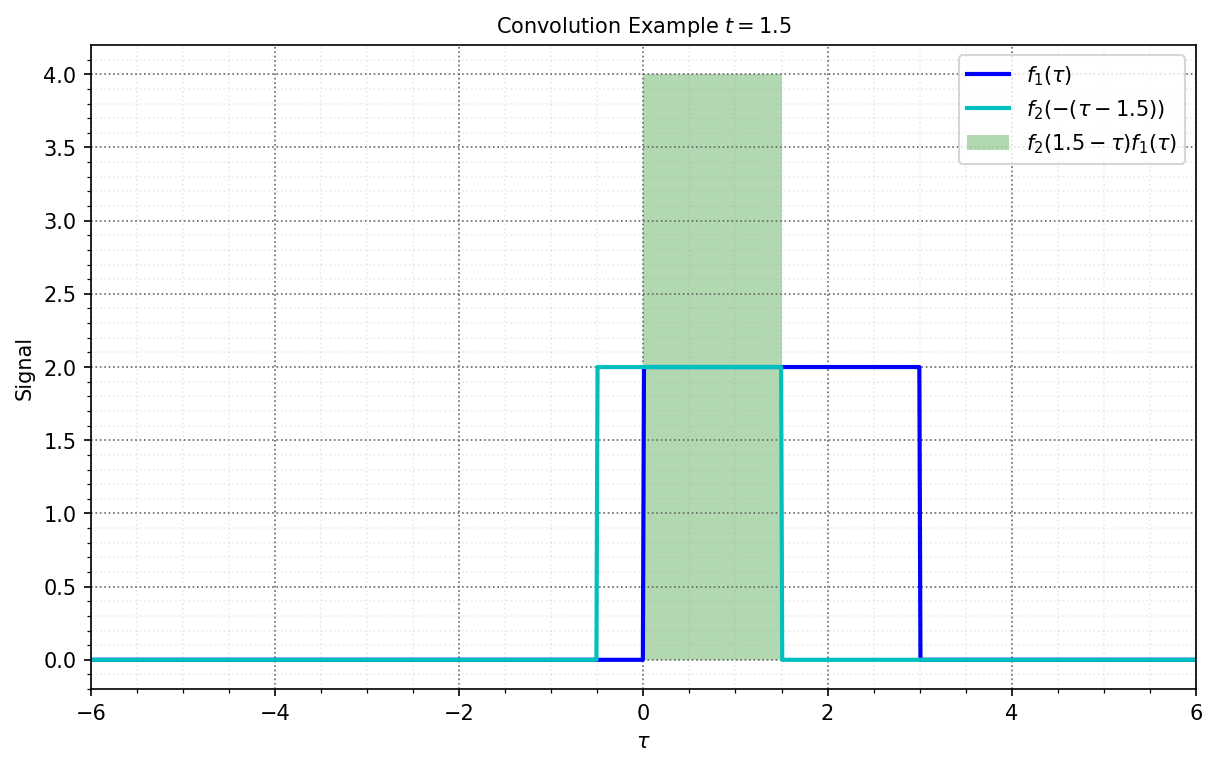

In [15]:
tval = f1min + f2max - 0.5
fig = plt.figure(2,figsize=(8, 5),constrained_layout = True)
plot_functions(tval)

### Approaching from left - inside

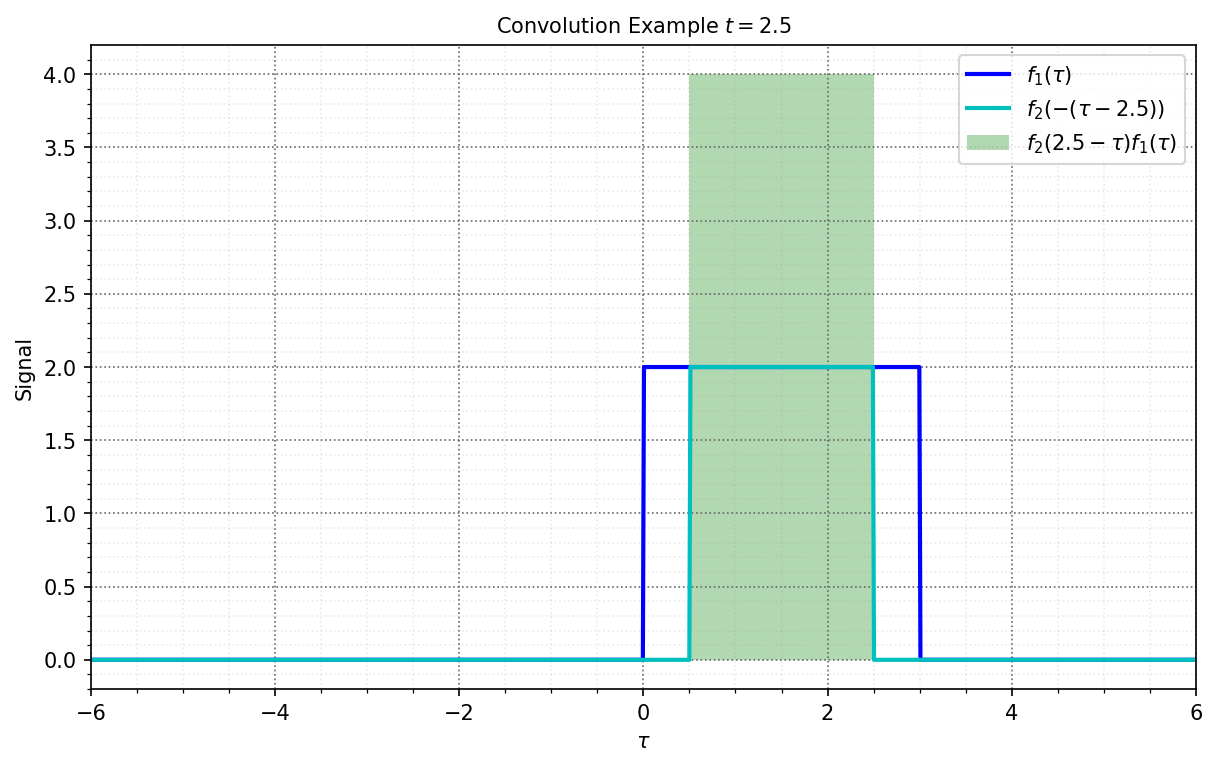

In [16]:
tval = f1min + f2max + 0.5
fig = plt.figure(3,figsize=(8, 5),constrained_layout = True)
plot_functions(tval)

### Passing out on the right

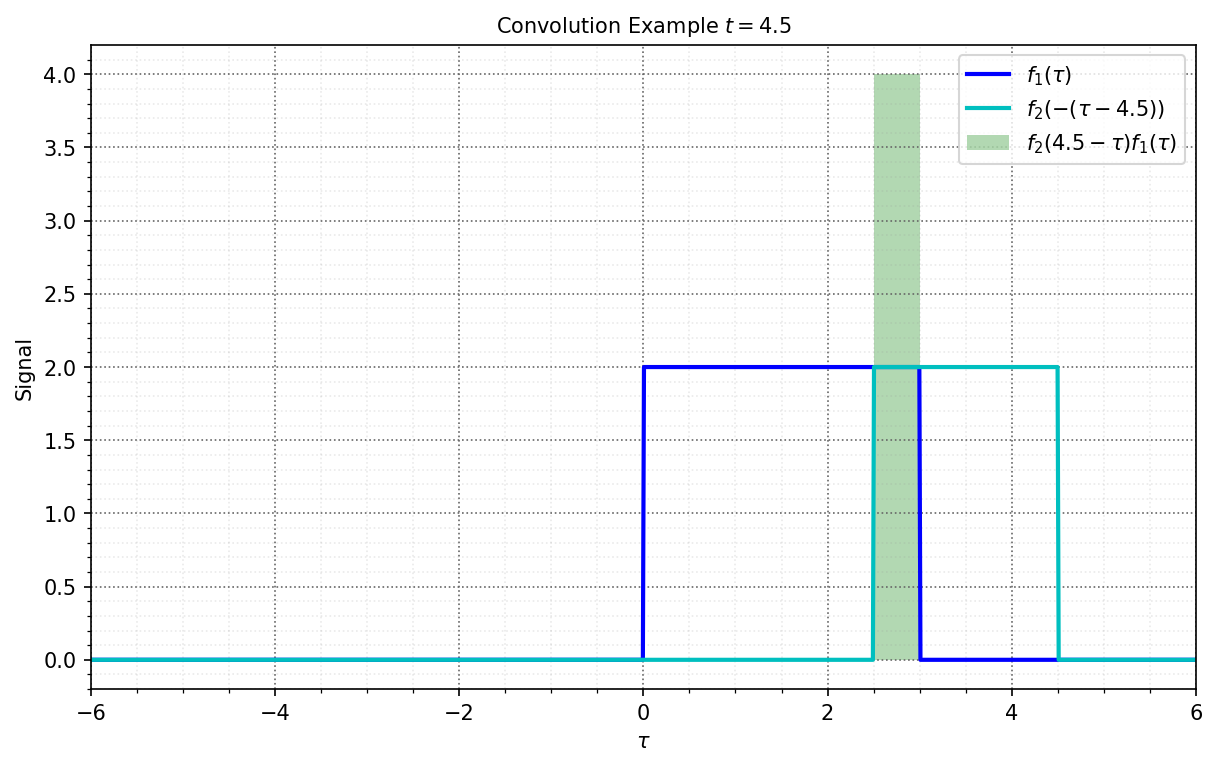

In [17]:
tval = f1max + f2max - 0.5
fig = plt.figure(4,figsize=(8, 5),constrained_layout = True)
plot_functions(tval)

## Final Result

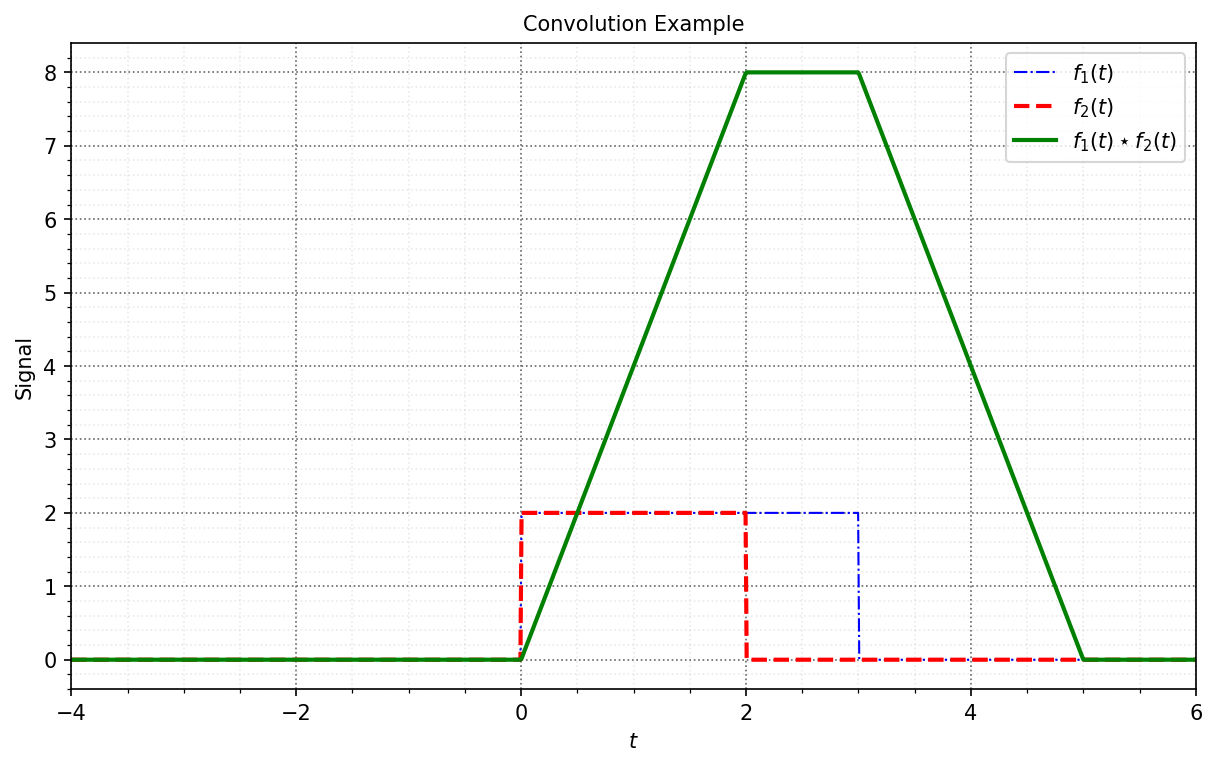

In [18]:
fig = plt.figure(5,figsize=(8, 5),constrained_layout = True)
plt.plot(tt_vals, lam_f1(tt_vals),'b-.',lw=1,label='$f_1(t)$')
plt.plot(tt_vals, lam_f2(tt_vals),'r--',label='$f_2(t)$')
plt.plot(tt_vals, f3_tt,'g-',lw=2,label='$f_1(t)\star f_2(t)$')
nicegrid()
plt.legend()
plt.ylabel("Signal")
plt.xlabel("$t$")
plt.title('Convolution Example')
plt.show()

## Further Convolution Examples -- Negative function values

In [12]:
if 1: # Example 2
    f1 = Piecewise((0, t < -1),(1, t <= 0),(-1, t <= 1),(0, True))
    f2 = Piecewise((0, t < 0),(2, t <= 2),(0, True))
    f3 = convolve(f1, f2, t)
    f3amp = f1amp*f2amp
else: # Example 3
    f1 = Piecewise((0, t < 1),(2, t <= 2),(0, True))
    f2 = Piecewise((0, t < 1),(-2, t <= 2),(0, True))
    f3 = convolve(f1, f2, t)
    f3amp = f1amp*f2amp


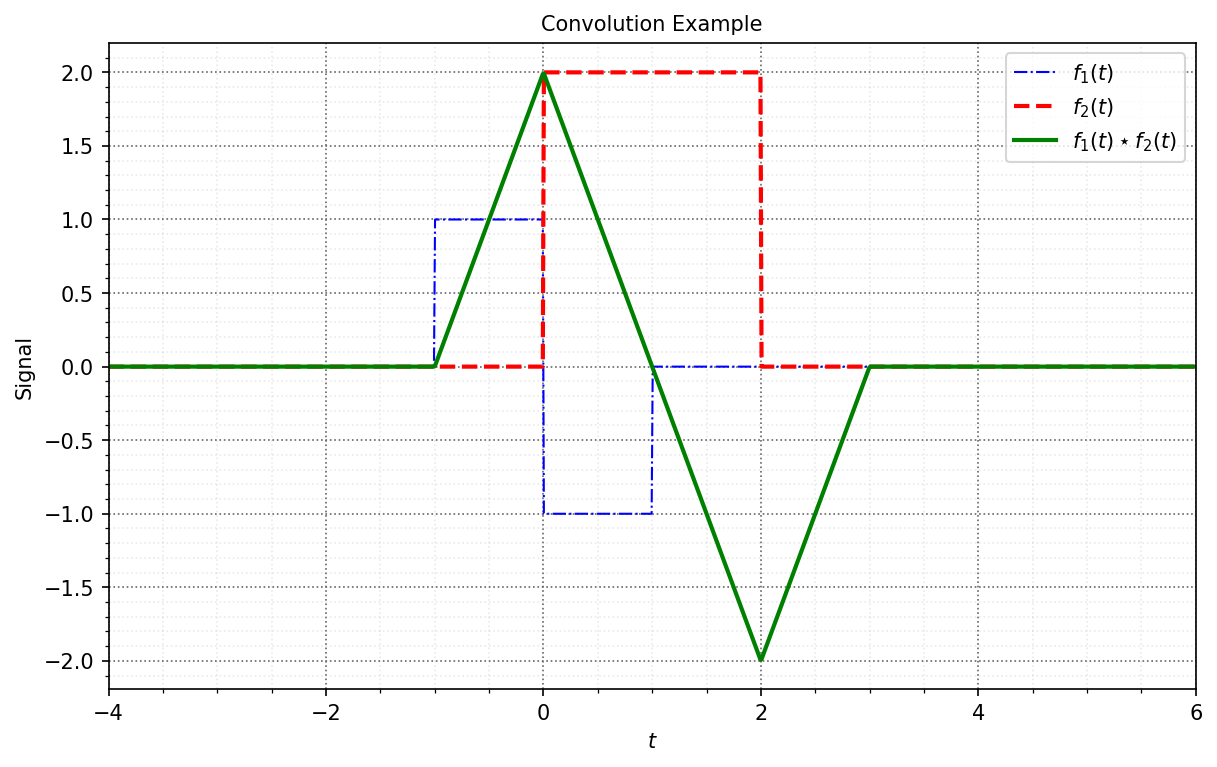

In [13]:
lam_f1 = lambdify(t, f1, modules=['numpy'])
lam_f2 = lambdify(t, f2, modules=['numpy'])
lam_f3 = lambdify(t, f3, modules=['numpy'])

tt_vals = linspace(-2-f2max+f1min, f1max+f2max+1, 1000)
tau_vals = linspace(-(f1max+f2max+1), f1max+f2max+1, 1000)

# don't know why lam_f3(tt_vals) fails
f3_tt = []
for tt in tt_vals:
    f3_tt.append(lam_f3(tt))

fig = plt.figure(5,figsize=(8, 5),constrained_layout = True)
plt.plot(tt_vals, lam_f1(tt_vals),'b-.',lw=1,label='$f_1(t)$')
plt.plot(tt_vals, lam_f2(tt_vals),'r--',label='$f_2(t)$')
plt.plot(tt_vals, f3_tt,'g-',lw=2,label='$f_1(t)\star f_2(t)$')
nicegrid()
plt.legend()
plt.ylabel("Signal")
plt.xlabel("$t$")
plt.title('Convolution Example')
plt.show()